# Introduction:
 
 Le Produit Intérieur Brut (PIB) est l'un des indicateurs les plus importants pour mesurer la santé économique d'un pays. Il représente la valeur totale des biens et services produits sur le territoire national pendant une période donnée. Dans ce contexte, l'étude de la série chronologique du PIB revêt une grande importance pour les économistes et les analystes financiers.

 Dans ce projet, nous nous intéressons à l'analyse de la série chronologique du PIB des Etats-Unis. Notre objectif est de déterminer les caractéristiques de cette série, ainsi que de modéliser sa partie stationnaire et de réaliser des prévisions hors échantillon.

 Dans un premier temps, nous présentons la série du PIB en utilisant un graphique et une analyse des autocorrélations (corréllogrammes) pour étudier sa structure temporelle. Ensuite, nous traitons la non-stationnarité de la série en utilisant les tests de racine unitaire tels que Dickey et Fuller, Dickey et Fuller augmenté, et Phillips et Perron. Nous choisissons ensuite le modèle ARMA le plus approprié pour modéliser la partie stationnaire de la série, en utilisant les autocorrélations (simples et partielles) et les critères d'information.
 
 Nous validons les modèles estimés en utilisant des tests de validation sur les résidus estimés. Si nécessaire, nous choisissons le modèle le plus pertinent parmi plusieurs modèles possibles tels que ARMA, ARFIMA, SARIMA, ARCH, GARCH, TARCH et EARCH. Enfin, nous calculons des prévisions hors échantillon pour évaluer la performance des modèles sélectionnés.

# Présentation de la série:
 Dans cette section, nous allons présenter la série chronologique du PIB que nous allons étudier dans ce projet, pour ceci nous allons extraire les données du PIB américain de la base de données FRED (Federal Reserve Economic Data).

 Visualisons la série chronologique à l'aide d'un graphique :

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

In [12]:
fred = Fred(api_key='6cc00d6dd7a79e8de471491dc74cc1fe')

In [16]:
data=fred.get_series('GDP')
data.name = 'PIB'
data=pd.DataFrame(data)
data.fillna(method='ffill',inplace=True)
data=data.fillna(0)
data

,PIB
1946-01-01,0.000
1946-04-01,0.000
1946-07-01,0.000
1946-10-01,0.000
1947-01-01,243.164
...,...
2021-10-01,24349.121
2022-01-01,24740.480
2022-04-01,25248.476
2022-07-01,25723.941


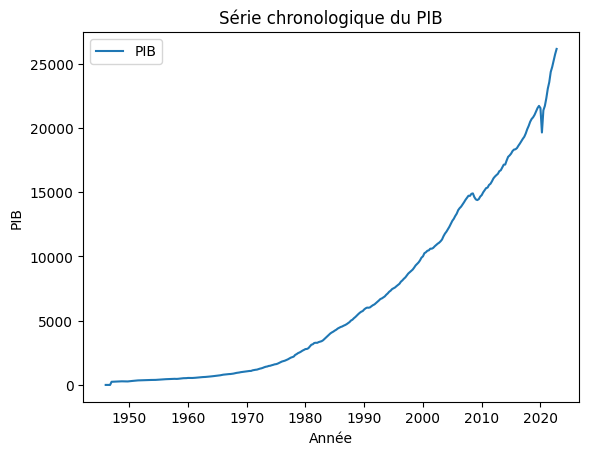

In [20]:
fig, ax = plt.subplots()
ax.plot(data.index, data['PIB'], label='PIB')
ax.set_title('Série chronologique du PIB')
ax.set_xlabel('Année')
ax.set_ylabel('PIB')
ax.legend()
plt.show()

### Le corréllogramme:

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

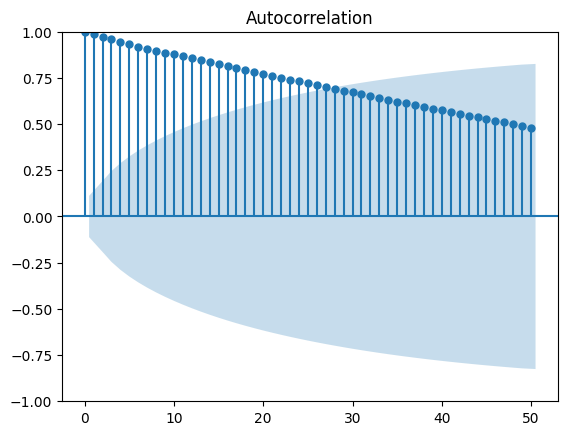

In [23]:
plot_acf(data['PIB'], lags=50)
plt.show()

Le corréllogramme montre une forte autocorrélation positive pour les premiers retards, ce qui suggère une forte dépendance temporelle dans les données. Cela peut indiquer une certaine non-stationnarité dans la série, qui doit être explorée plus en détail dans la section suivante.




